<a href="https://colab.research.google.com/github/Santanukolkata/Data_Science/blob/master/Models/Linear_Regression/Loss_functions_on_Boston_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MSE vs. MAE (L2 loss vs L1 loss)
In machine learning we come across L1 and L2, and there are 2 aspects

> 1) L1-loss function vs L2-loss function 

> 2) L1-regularization vs L2-regularization (norms)
1. Key point - L2/MSE is sensitive to outliers
MSE is sensitive to outliers (MAE is not)
both functions reach the minimum when the prediction is exactly equal to the true value.
One ** big problem ** in using MAE loss (for neural nets especially) is
its gradient is the same throughout,
which means the gradient will be large even for small loss values.
This isn’t good for learning.
To fix this, we can use dynamic learning rate which decreases as we move closer to the minima.
MSE behaves nicely in this case and will converge even with a fixed learning rate.
The gradient of MSE loss is high for larger loss values and decreases as loss approaches 0, making it more precise at the end of training
L1 loss is more robust to outliers, but its derivatives are not continuous, making it inefficient to find the solution.

L2 loss is sensitive to outliers, but gives a more stable and closed form solution (by setting its derivative to 0.)

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
d=load_boston()

data = pd.DataFrame(d.data,columns=d.feature_names)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [4]:
# Create a data frame with all the independent features
X = data
# Create a target vector(vector of dependent variable, i.e. 'medv')
y = d.target

In [6]:
# Split data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(
                                    X, y,
                                    test_size = 0.20,
                                    random_state = 42)

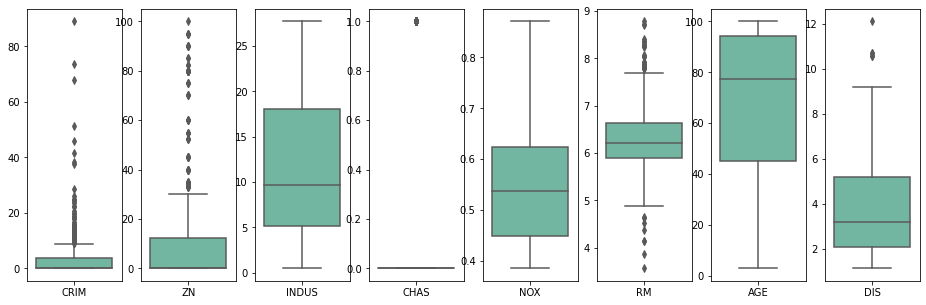

In [7]:
fig, axes = plt.subplots(ncols=8, figsize=(16, 5))

sns.boxplot(data=data[['CRIM']],  palette='Set2', ax=axes[0]);
sns.boxplot(data=data[['ZN']]  ,   palette='Set2', ax=axes[1]);
sns.boxplot(data=data[['INDUS']],  palette='Set2', ax=axes[2]);
sns.boxplot(data=data[['CHAS']]  ,   palette='Set2', ax=axes[3]);
sns.boxplot(data=data[['NOX']],  palette='Set2', ax=axes[4]);
sns.boxplot(data=data[['RM']]  ,   palette='Set2', ax=axes[5]);
sns.boxplot(data=data[['AGE']],  palette='Set2', ax=axes[6]);
sns.boxplot(data=data[['DIS']]  ,   palette='Set2', ax=axes[7]);

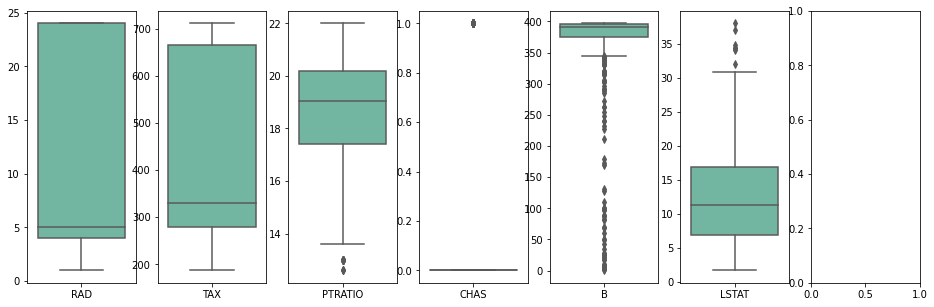

In [8]:
fig, axes = plt.subplots(ncols=7, figsize=(16, 5))

sns.boxplot(data=data[['RAD']],  palette='Set2', ax=axes[0]);
sns.boxplot(data=data[['TAX']]  ,   palette='Set2', ax=axes[1]);
sns.boxplot(data=data[['PTRATIO']],  palette='Set2', ax=axes[2]);
sns.boxplot(data=data[['CHAS']]  ,   palette='Set2', ax=axes[3]);
sns.boxplot(data=data[['B']],  palette='Set2', ax=axes[4]);
sns.boxplot(data=data[['LSTAT']]  ,   palette='Set2', ax=axes[5]);

In [9]:
# function for L2 (MSE)
def rmse(predictions, targets):
    
    difference         = predictions - targets
    difference_squared = difference ** 2
        
    mse  = np.sum(difference_squared)/targets.size
    
    rmse = np.sqrt(mse)

    return rmse

In [10]:
# GradientBoostingRegressor with a L1(Least Absolute Deviations) loss function
# Set a random seed so that we can reproduce the results
np.random.seed(32767)

mod = GradientBoostingRegressor(loss='lad')

fit = mod.fit(train_X, train_y)
predict = fit.predict(test_X)

# Root Mean Squared Error
print ("RMSE -> %f" % rmse(predict, test_y))

RMSE -> 3.372776


In [11]:
# GradientBoostingRegressor with L2(Least Square errors) loss function
mod = GradientBoostingRegressor(loss='ls')

fit = mod.fit(train_X, train_y)
predict = fit.predict(test_X)

# Root Mean Squared Error
print ("RMSE -> %f" % rmse(predict, test_y))

RMSE -> 2.502083


As apparent from RMSE errors of L1 and L2 loss functions, Least Squares(L2) outperform L1, when there are no outliers in the data.

### add some outliers

In [12]:
stats = data.describe()
extremes = stats.loc[['min', 'max'], :]
extremes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
min,0.00632,0.0,0.46,0.0,0.385,3.561,2.9,1.1296,1.0,187.0,12.6,0.32,1.73
max,88.97620,100.0,27.74,1.0,0.871,8.780,100.0,12.1265,24.0,711.0,22.0,396.90,37.97


In [17]:
np.random.seed(1234)
rands = np.random.rand(5, 1)
print(rands)
min_array = np.array(extremes.loc[['min'], :])
max_array = np.array(extremes.loc[['max'], :])

[[0.19151945]
 [0.62210877]
 [0.43772774]
 [0.78535858]
 [0.77997581]]


In [18]:
min_array

array([[6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
        3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
        1.2600e+01, 3.2000e-01, 1.7300e+00]])

In [19]:
# Find the difference(range) of 'max' and 'min'
range = max_array - min_array

In [20]:
outliers_X = (rands * range) + min_array
outliers_X

array([[1.70457825e+01, 1.91519450e+01, 5.68465061e+00, 1.91519450e-01,
        4.78078453e-01, 4.56054001e+00, 2.14965386e+01, 3.23572024e+00,
        5.40494736e+00, 2.87356192e+02, 1.44002828e+01, 7.62727836e+01,
        8.67066488e+00],
       [5.53552627e+01, 6.22108771e+01, 1.74311273e+01, 6.22108771e-01,
        6.87344863e-01, 6.80778568e+00, 6.33067617e+01, 7.97086794e+00,
        1.53085017e+01, 5.12984996e+02, 1.84478224e+01, 2.47035896e+02,
        2.42752219e+01],
       [3.89509044e+01, 4.37727739e+01, 1.24012127e+01, 4.37727739e-01,
        5.97735681e-01, 5.84550107e+00, 4.54033635e+01, 5.94324817e+00,
        1.10677380e+01, 4.16369335e+02, 1.67146407e+01, 1.73914067e+02,
        1.75932533e+01],
       [6.98795789e+01, 7.85358584e+01, 2.18845822e+01, 7.85358584e-01,
        7.66684272e-01, 7.65978645e+00, 7.91583185e+01, 9.76610981e+00,
        1.90632474e+01, 5.98527898e+02, 1.99823707e+01, 3.11777507e+02,
        3.01913951e+01],
       [6.94006741e+01, 7.79975808e+

In [21]:
# We will also create some hard coded outliers
# for 'medv', i.e. our target
medv_outliers = np.array([0, 0, 600, 700, 600])

In [23]:
# Change the type of 'chas', 'rad' and 'tax' to rounded of Integers
outliers_X[:, [3, 8, 9]] = np.int64(np.round(outliers_X[:, [3, 8, 9]]))
outliers_X

array([[1.70457825e+01, 1.91519450e+01, 5.68465061e+00, 0.00000000e+00,
        4.78078453e-01, 4.56054001e+00, 2.14965386e+01, 3.23572024e+00,
        5.00000000e+00, 2.87000000e+02, 1.44002828e+01, 7.62727836e+01,
        8.67066488e+00],
       [5.53552627e+01, 6.22108771e+01, 1.74311273e+01, 1.00000000e+00,
        6.87344863e-01, 6.80778568e+00, 6.33067617e+01, 7.97086794e+00,
        1.50000000e+01, 5.13000000e+02, 1.84478224e+01, 2.47035896e+02,
        2.42752219e+01],
       [3.89509044e+01, 4.37727739e+01, 1.24012127e+01, 0.00000000e+00,
        5.97735681e-01, 5.84550107e+00, 4.54033635e+01, 5.94324817e+00,
        1.10000000e+01, 4.16000000e+02, 1.67146407e+01, 1.73914067e+02,
        1.75932533e+01],
       [6.98795789e+01, 7.85358584e+01, 2.18845822e+01, 1.00000000e+00,
        7.66684272e-01, 7.65978645e+00, 7.91583185e+01, 9.76610981e+00,
        1.90000000e+01, 5.99000000e+02, 1.99823707e+01, 3.11777507e+02,
        3.01913951e+01],
       [6.94006741e+01, 7.79975808e+

In [24]:
# Finally concatenate our existing 'train_X' and
# 'train_y' with these outliers
train_X = np.append(train_X, outliers_X, axis = 0)
train_y = np.append(train_y, medv_outliers, axis = 0)

Text(0, 0.5, 'count')

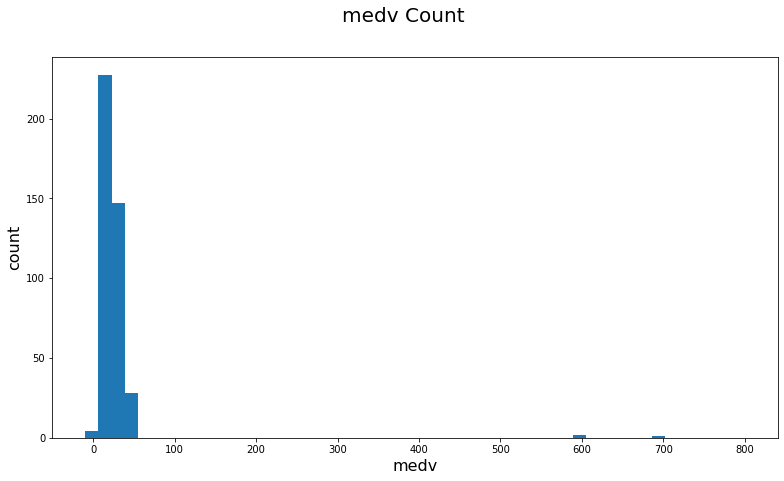

In [25]:
# Plot a histogram of 'medv' in train_y
fig = plt.figure(figsize=(13,7))
plt.hist(train_y, bins=50, range = (-10, 800))
fig.suptitle('medv Count', fontsize = 20)
plt.xlabel('medv', fontsize = 16)
plt.ylabel('count', fontsize = 16)

In [26]:
# GradientBoostingRegressor with L1 loss function
np.random.seed(9876)

mod = GradientBoostingRegressor(loss='lad')

fit = mod.fit(train_X, train_y)
predict = fit.predict(test_X)

# Root Mean Squared Error
print ("RMSE -> %f" % rmse(predict, test_y))

RMSE -> 3.659125


In [27]:
# GradientBoostingRegressor with L2 loss function
mod = GradientBoostingRegressor(loss='ls')

fit = mod.fit(train_X, train_y)
predict = fit.predict(test_X)

# Root Mean Squared Error
print ("RMSE -> %f" % rmse(predict, test_y))

RMSE -> 9.779870


With outliers in the dataset, a L2(Loss function) tries to adjust the model according to these outliers on the expense of other good-samples, since the squared-error is going to be huge for these outliers(for error > 1). 

On the other hand L1(Least absolute deviation) is quite resistant to outliers.

> As a result, L2 loss function may result in huge deviations in some of the samples which results in reduced accuracy.

> So, if you can ignore the ouliers in your dataset or you need them to be there, then you should be using a ** L1 loss function **

> on the other hand if you don’t want undesired outliers in the dataset and would like to use a stable solution then first of all you should try to __remove the outliers and then use a L2 loss function__. 

Whenever in doubt, prefer L2 loss function, it works pretty well in most of the situations.